In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Kaggle: Housing Data for Ames, Iowa
Description:
This dataset is provided by Kaggle to perform analysis on and develop skills in machine learning and application of statistic models to predict the price of home in Ames, Iowa.

#### Import train dataset to begin analysis

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Before Analysis Begins
Now is the time to examine our variables and create a data dictionary that defines some critical information. For the purpose of this study we are interesed in the effects that each variable has on the SalesPrice varibale. This would make SalesPrice our dependent variable.

When creating our dictionary it is best practice to take each variable and do the following:
<br>
- Variable name
- Variable type
- Expected Impact on dependent variable
- Conclusion confirming or rejecting our expectation
- General Comments

In doing so I have narrowed the dataset to variables that I believe are important when pricing a home including: LotArea, OverallQual, YearBuilt, GrLivArea, TotalBsmtSF, GarageArea, TotRmsAbvGrd, FullBath and HalfBath

I will now test my expectations by creating scatter plots to visualize the relationship between these variables and SalePrice. I will keep elements with a strong relationships.

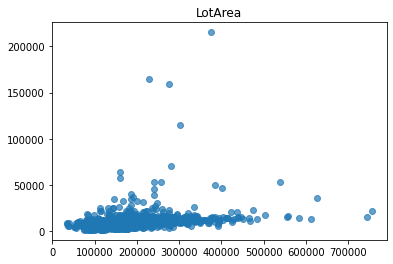

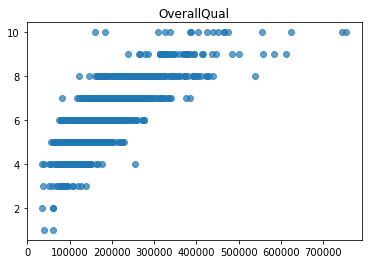

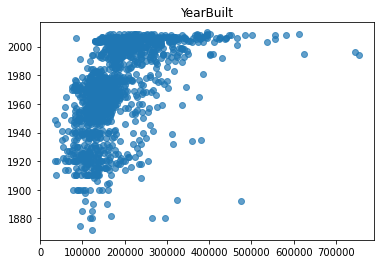

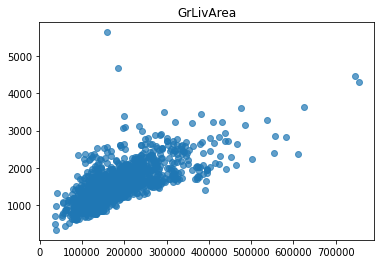

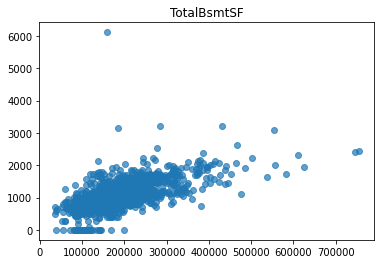

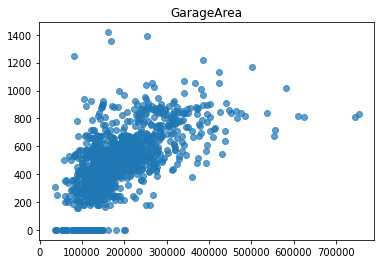

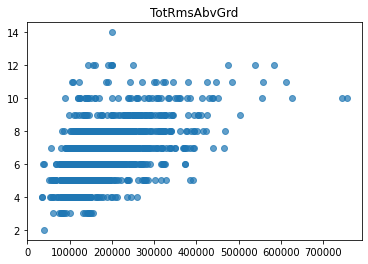

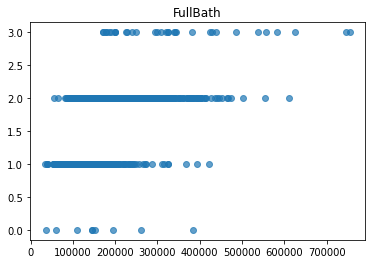

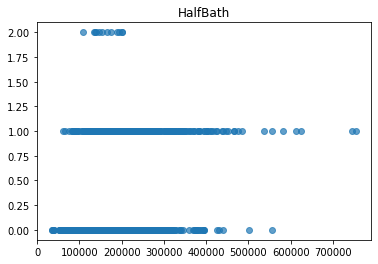

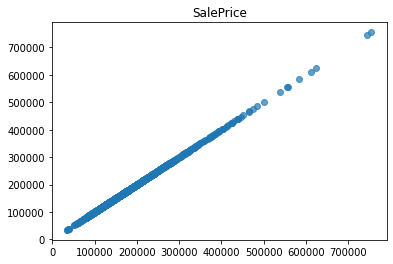

In [6]:
expectation_columns = ['LotArea', 'OverallQual', 
                       'YearBuilt', 'GrLivArea', 'TotalBsmtSF', 
                       'GarageArea', 'TotRmsAbvGrd', 'FullBath', 
                       'HalfBath', 'SalePrice']

for i in expectation_columns:
    x = train_df['SalePrice']
    y = train_df[i]
    plt.scatter(x, y, alpha=0.7)
    plt.title(i)
    plt.show()

Based on the resulting scatter plots we can see noticible strong relationships in OverallQual, YearBuilt, GrLivArea, TotalBsmtSF, GarageArea, and TotRmsAbvGrd.

Based on these results I will filter down our model to include these columns

In [7]:
columns_keep = ['OverallQual', 'YearBuilt', 'GrLivArea', 
                'TotalBsmtSF', 'GarageArea', 'TotRmsAbvGrd', 
                'SalePrice']
new_train_df = train_df[columns_keep]

In [8]:
new_train_df.head(5)

,OverallQual,YearBuilt,GrLivArea,TotalBsmtSF,GarageArea,TotRmsAbvGrd,SalePrice
0,7,2003,1710,856,548,8,208500
1,6,1976,1262,1262,460,6,181500
2,7,2001,1786,920,608,6,223500
3,7,1915,1717,756,642,7,140000
4,8,2000,2198,1145,836,9,250000


#### Analyzing The Dependent Varibale: SalePrice
SalePrice is our dependent variable and what we are analyzing. Before we dive further into building a model, let's understand what this variable is.

In [9]:
# Descriptive statistics summary
new_train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

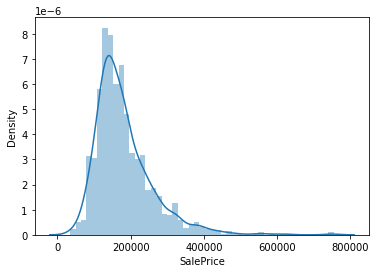

In [12]:
# histogram
sns.distplot(new_train_df['SalePrice']);

Our data appears to deviate from the normal distribution and is skewed to the right implying positive skewness

In [14]:
print("Skewness: %f" % new_train_df['SalePrice'].skew())
print("Kurtosis: %f" % new_train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


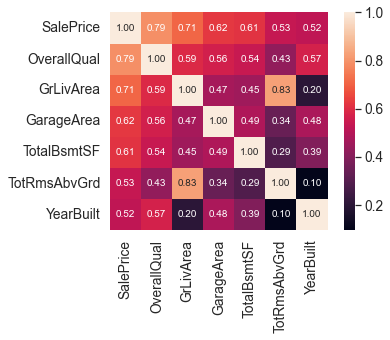

In [16]:
#saleprice correlation matrix
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

A lighter color on the map implies stronger corrleation. Based on this chart we can see that OverallQual appears to be the most closely correlated to SalePrice with GrLvArea closely behind.

If we pay close attention we can see that TotRmsAbvGrd and GrLivArea are strongly correlated. This can cause introduce redundancy in our model and we do not want to include both of these variables. Since we have previously determined that GrLivArea is strongly correlated with SalePrice we can choose to exclude TotRmsAbvGrd.

This decision makes sense because the GrLivArea would be determined by the TotRmsAbvGrd.

In [22]:
#Drop column and create final dataframe
final_df = new_train_df.drop(columns='TotRmsAbvGrd')

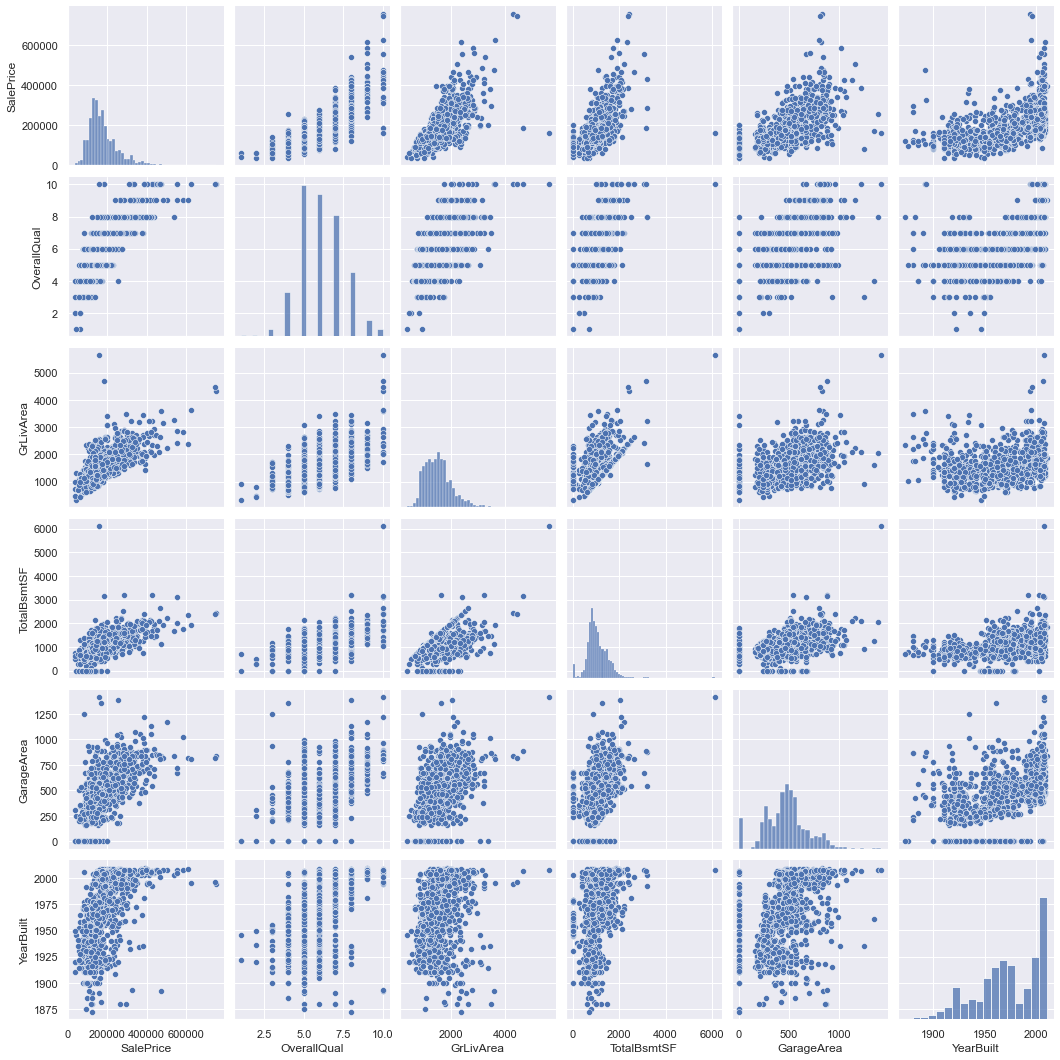

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
sns.pairplot(final_df[cols], size = 2.5)
plt.show();

With this we are prepared to develop a linear regression model to allow us to predict the SalePrice of a home in Ames, Iowa.

#### To see the model in action check out the streamlit application I developed.